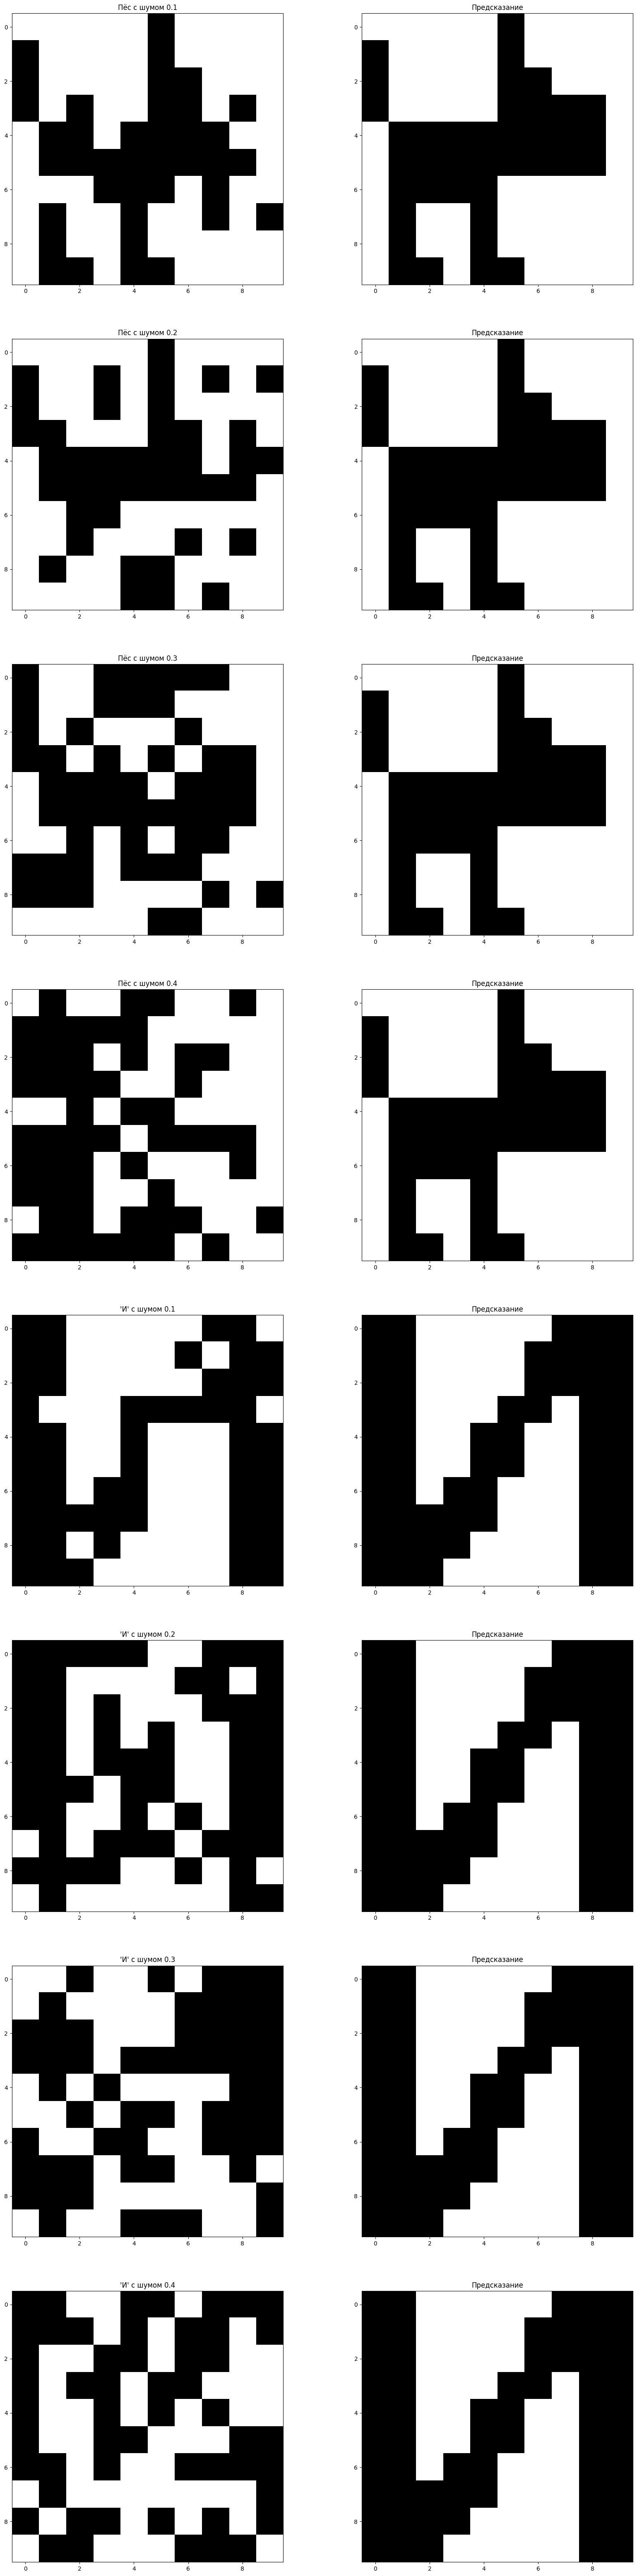

In [2]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n):
        self.n = n
        self.weights = np.zeros((n, n))

    def train(self, patterns):
        self.weights = sum([np.outer(i,i.T) for i in patterns])/self.n
        np.fill_diagonal(self.weights, 0)

    def predict(self, state):
        new_state = np.sign(np.dot(self.weights, state))
        while not np.array_equal(new_state, state):
            state = new_state
            new_state = np.sign(np.dot(self.weights, state))
        return new_state

network = HopfieldNetwork(100)

test1 = np.array([
    [-1,-1,-1,-1,-1,1,-1,-1,-1,-1],
    [1,-1,-1,-1,-1,1,-1,-1,-1,-1],
    [1,-1,-1,-1,-1,1,1,-1,-1,-1],
    [1,-1,-1,-1,-1,1,1,1,1,-1],
    [-1,1,1,1,1,1,1,1,1,-1],
    [-1,1,1,1,1,1,1,1,1,-1],
    [-1,1,1,1,1,-1,-1,-1,-1,-1],
    [-1,1,-1,-1,1,-1,-1,-1,-1,-1],
    [-1,1,-1,-1,1,-1,-1,-1,-1,-1],
    [-1,1,1,-1,1,1,-1,-1,-1,-1]
]).reshape((100,))
test2 = np.array([
    [1,1,-1,-1,-1,-1,-1,1,1,1],
    [1,1,-1,-1,-1,-1,1,1,1,1],
    [1,1,-1,-1,-1,-1,1,1,1,1],
    [1,1,-1,-1,-1,1,1,-1,1,1],
    [1,1,-1,-1,1,1,-1,-1,1,1],
    [1,1,-1,-1,1,1,-1,-1,1,1],
    [1,1,-1,1,1,-1,-1,-1,1,1],
    [1,1,1,1,1,-1,-1,-1,1,1],
    [1,1,1,1,-1,-1,-1,-1,1,1],
    [1,1,1,-1,-1,-1,-1,-1,1,1]
]).reshape((100,))
patterns = [test1, test2]

network.train(patterns)

def add_noise(array, noise_level=0.1):
    num_pixels_to_noise = int(len(array) * noise_level)
    noise_indices = np.random.choice(len(array), num_pixels_to_noise, replace=False)
    array[noise_indices] *= -1
    return array



import matplotlib.pyplot as plt

fig, axes = plt.subplots(8,2, figsize=(20,80))

def tests(j):
    noise = 0.1
    for i in range(j*4, j*4+4):
        test = add_noise(patterns[j].copy(), noise)
        pred = network.predict(test)

        axes[i][0].imshow(test.reshape((10,10)), cmap='binary')
        axes[i][1].imshow(pred.reshape((10,10)), cmap='binary')
        axes[i][0].title.set_text(("'И'" if j else "Пёс") + f" с шумом {noise:.1f}")
        axes[i][1].title.set_text("Предсказание")

        noise += 0.1

tests(0)
tests(1)

plt.show()
